In [2]:
import atmPy
import xarray as xr

/Users/htelg/prog/atm-py/atmPy/general/flightpath.py:8: UserWarning: An error accured while trying to import mpl_toolkits.basemap.Basemap. Plotting of maps will not work!
  warnings.warn("An error accured while trying to import mpl_toolkits.basemap.Basemap. Plotting of maps will not work!")
/Users/htelg/prog/atm-py/atmPy/general/measurement_site.py:5: UserWarning: There seams to be an issue with importing mpl_toolkits.basemap. Make sure it is installed and working (try: "from mpl_toolkits.basemap import Basemap as _Basemap"). For now plotting on map will not be possible
  warnings.warn('There seams to be an issue with importing mpl_toolkits.basemap. Make sure it is installed and working (try: "from mpl_toolkits.basemap import Basemap as _Basemap"). For now plotting on map will not be possible')
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:12: UserWarning: There seams to be an issue with importing the pysolar library. Make sure it is installed and running correctly (try: "from Pyso

In [3]:
%matplotlib inline
plt.style.use('hagen_default')

In [4]:
fname = '/Volumes/HTelg_4TB_Backup/arm_data/SGP/aosuhsasE13.a1/sgpaosuhsasE13.a1.20161115.212954.nc'
# fname = '/Volumes/HTelg_4TB_Backup/arm_data/OLI/uhsas/oliaosuhsasM1.a1.20170401.000008.nc'
dist = atmPy.data_archives.arm.read_uhsas(fname)

(<Figure size 800x640 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x1d246e7b38>)

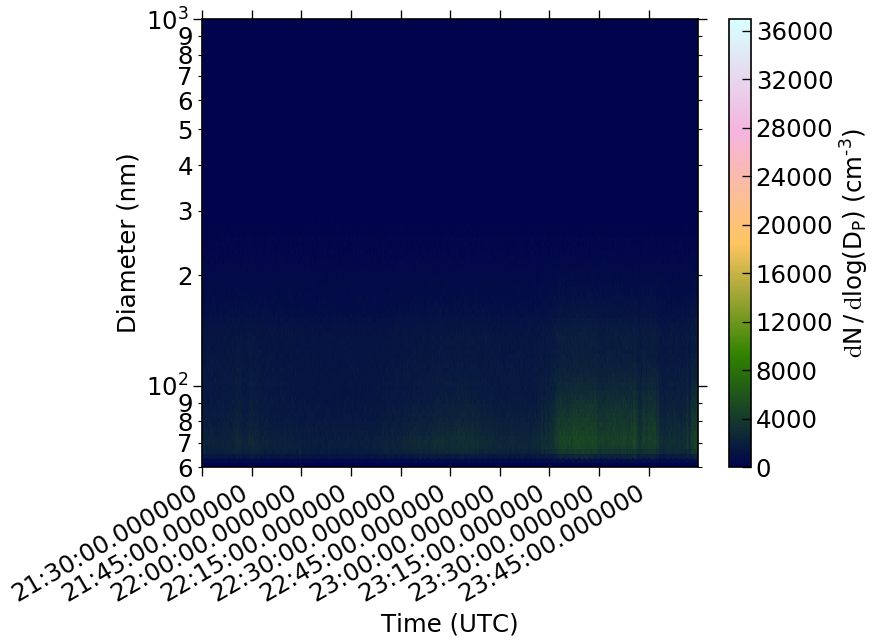

In [5]:
dist.plot()

# Oli

In [3]:
fname = '/Volumes/HTelg_4TB_Backup/arm_data/OLI/uhsas/oliaosuhsasM1.a1.20170811.000008.nc'
# fname = '/Volumes/HTelg_4TB_Backup/arm_data/OLI/uhsas/oliaosuhsasM1.a1.20170401.000008.nc'
dist = atmPy.data_archives.arm.read_uhsas(fname)

(<matplotlib.figure.Figure at 0x114408eb8>,
 <matplotlib.colorbar.Colorbar at 0x123aaf198>)

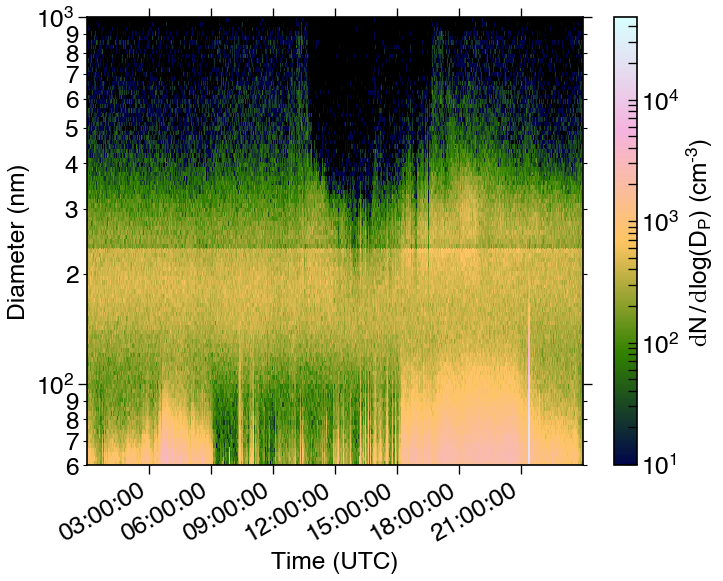

In [5]:
dist.plot(norm = 'log')

# using xarray

In [6]:
fname = '/Volumes/HTelg_4TB_Backup/arm_data/OLI/uhsas/oliaosuhsasM1.a1.20170401.000008.nc'
fname = '/Volumes/HTelg_4TB_Backup/arm_data/OLI/uhsas/oliaosuhsasM1.a1.20170811.000008.nc'
data = xr.open_dataset(fname)

In [12]:
if 'sample_flow_rate' in data.variables.keys():
    print('bla')

bla


In [11]:
data

<xarray.Dataset>
Dimensions:                   (bin_num: 99, time: 8639)
Coordinates:
  * time                      (time) datetime64[ns] 2017-08-11T00:00:08.560000 ...
  * bin_num                   (bin_num) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
Data variables:
    base_time                 datetime64[ns] 2017-08-11
    time_offset               (time) datetime64[ns] 2017-08-11T00:00:08.560000 ...
    sample_accumulation_time  (time) float32 10.0 10.0 10.0 10.0 10.0 10.0 ...
    scattering_voltage        (time) float64 0.969 0.955 0.955 0.952 0.967 ...
    current_sensor            (time) float64 1.366 1.367 1.371 1.367 1.372 ...
    sample_flow_rate          (time) float64 49.59 49.58 49.58 49.57 49.58 ...
    laser_reference_voltage   (time) float64 2.494 2.494 2.494 2.494 2.494 ...
    raw_temperature_signal    (time) float64 1.021 1.021 1.021 1.022 1.021 ...
    sheath_flow_rate          (time) float64 640.1 640.1 640.1 640.1 640.1 ...
    differential_voltage      (time) float64

In [3]:
sd = data.size_distribution.to_pandas()

# normalize total numbers to numbers/(cc)
## normalize to integration interval
sd /= float(data.sampling_interval.split()[0]) #normalize to integration interval

## normalize to flow rate
flowrate = data.sampling_volume.values / 60.
sd = sd.divide(flowrate, axis=0)

binedges = np.append(data.lower_size_limit.data,data.upper_size_limit.data[-1])
sdts = atmPy.aerosols.size_distribution.sizedistribution.SizeDist_TS(sd, binedges, 'numberConcentration')
sdts._data_period = float(data.sampling_interval.split()[0])
sdts = sdts.convert2dNdlogDp()
return sdts

(<matplotlib.figure.Figure at 0x11617a2b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1190cb710>)

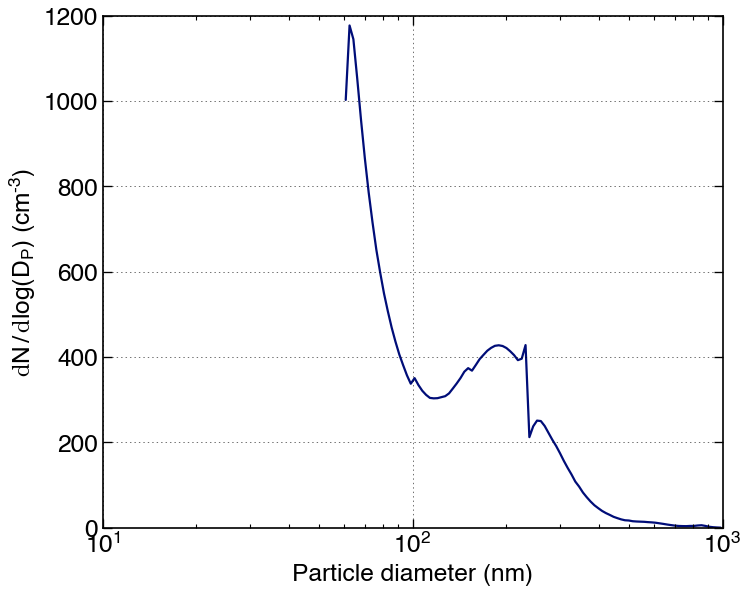

In [11]:
avg.plot()